In [1]:
from tocco import __main__ as tocco
from tocco import Viz_ToCCo as viz
from tocco.mod import *
from sympy import lambdify
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file0 = "./output_SH_order0_1.dat"
solfull,dic = viz.import_data(file0)

In [3]:
T = 7
Ev = 1
Et = 1e-3
X,Z  = np.meshgrid(np.linspace(0,4*np.pi,200),np.linspace(-0.2,0.14,400))
Y=0

In [4]:
solfull[0]

   ⎛⎧                                                                         
                   ⎜⎪   ⎛                                                     
   ⎜⎪εₜ⋅⎝0.0000000046860322929873959392461582931562132810830076431975468323838
 ⎜⎨                                                                           
 ⎜⎪                                                                           
 ⎜⎪                                                                           
⎝⎩                                                                            

                                                                              
                                                                              
1⋅(-1883781724.55328283797709997819293941124460267568206057588892 + 1883357287
                                                                              
                                                                              
                                                   

In [5]:
lh = lambdify([x,y,et],dic['h'])
lhm = lambdify([x,y,et],dic['h_m'])

In [6]:
U = solfull[0]
B = solfull[2]
J = curl(B)*dic['qRmfull'] -U.cross(B)

lfunc_ux = viz.lambda_func(U&C.i)
lfunc_uz = viz.lambda_func(U&C.k)

lfunc_bx = viz.lambda_func(B&C.i)
lfunc_bz = viz.lambda_func(B&C.k)

lfunc_jx = viz.lambda_func(J&C.i)
lfunc_jz = viz.lambda_func(J&C.k)


BB = sqrt(B.dot(B))
lfunc_BB = viz.lambda_func(BB)

UU = sqrt(U.dot(U))
lfunc_UU = viz.lambda_func(UU)

JJ = sqrt(J.dot(J))
lfunc_JJ = viz.lambda_func(JJ)


In [7]:
UX = np.real(lfunc_ux(X,Y,Z,T,Ev,Et))
UZ = np.real(lfunc_uz(X,Y,Z,T,Ev,Et))

BX = np.real(lfunc_bx(X,Y,Z,T,Ev,Et))
BZ = np.real(lfunc_bz(X,Y,Z,T,Ev,Et))

JX = np.real(lfunc_jx(X,Y,Z,T,Ev,Et))
JZ = np.real(lfunc_jz(X,Y,Z,T,Ev,Et))

# # UZ[UZ == 0] = np.nan
# # UX[UX == 0] = np.nan
JD = lfunc_JJ(X,Y,Z,T,Ev,Et)
BD = lfunc_BB(X,Y,Z,T,Ev,Et)
UD = lfunc_UU(X,Y,Z,T,Ev,Et)

UD[UD == 0] = np.nan
JD[UD == 0] = np.nan

/home/isterre/miniconda3/lib/python3.12/site-packages/numpy/lib/scimath.py:135: RuntimeWarning: invalid value encountered in less
  if any(isreal(x) & (x < 0)):


/home/isterre/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/isterre/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


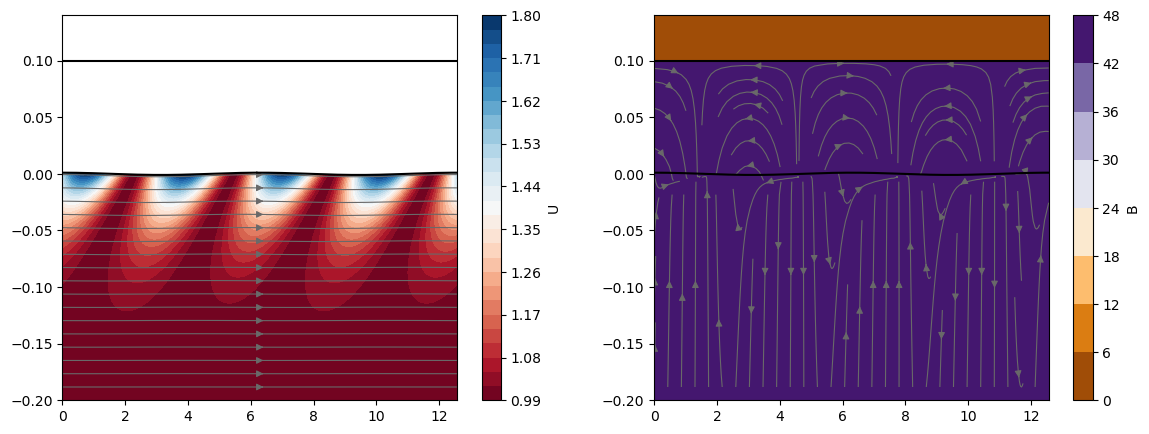

In [9]:

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5))

# ll = np.linspace(np.min(UX[UX!=0]),np.max(UX[UX!=0]),30)

ma1 = ax1.contourf(X,Z,np.real(UD),30,cmap='RdBu')
fig.colorbar(ma1,label = 'U',ax=ax1)
ax1.streamplot(X,Z,UX,UZ,color='dimgray',linewidth =0.8)

ma2 = ax2.contourf(X,Z,np.real(JD),cmap='PuOr')
fig.colorbar(ma2,label = 'B',ax=ax2)
ax2.streamplot(X,Z,JX,JZ,color='dimgray',linewidth =0.8)
# cut = 20
# ax2.quiver(X[::cut,::cut], Z[::cut,::cut], BX[::cut,::cut]*1000, BZ[::cut,::cut],angles='xy')

for ax in ax1,ax2:
    ax.plot(X[0],lh(X[0],Y,Et),color='k')
    ax.plot(X[0],lhm(X[0],Y,Et)*np.ones(len(X[0])),color='k')

    ax.set_ylim(np.min(Z),np.max(Z))
    ax.set_xlim(np.min(X),np.max(X))


plt.savefig('B_flat.png',bbox_inches = 'tight', dpi=300)

sqrt((25*epsilon_t**2*((9.22253315726917281259131427108692638035898215009735403371278e-61 - 2.83448059269696838469073078951326887731995377528065659517511e-61*I)*exp(2*C.x*I) + 9.22253315726917281259131427108692638035898215009735403371278e-61 + 2.83448059269696838469073078951326887731995377528065659517511e-61*I)**2 + 3514.13708264125314363928103970777452979004479566985928076216*epsilon_t**2*(0.0843452548738762169472648594958595552230059040561424663922068*(11.8560315158846522756475918468196867965672509326146843110127 - 3.64386776009482397643655547693348307401730761532622514204172*I)*exp(2*C.x*I) + 1 + 0.30734295495189836562559974608921194272046132879632900071378*I)**2 + 49729*(-0.0158544121342275229686287973566109650063864560019837227934605*I*epsilon_t*(16.7669605656869203328883306058186147898614409481045741575669 + 5.15320720582017149325882371986412709032177390601179752217947*I) + (0.0158544121342275229686287973566109650063864560019837227934605*I*epsilon_t*(16.76696056568692033288833060

/home/isterre/Documents/Postdoc2/Tocco_release/tocco/src/tocco/Viz_ToCCo.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
  Var_tot[OC] = luf


ok


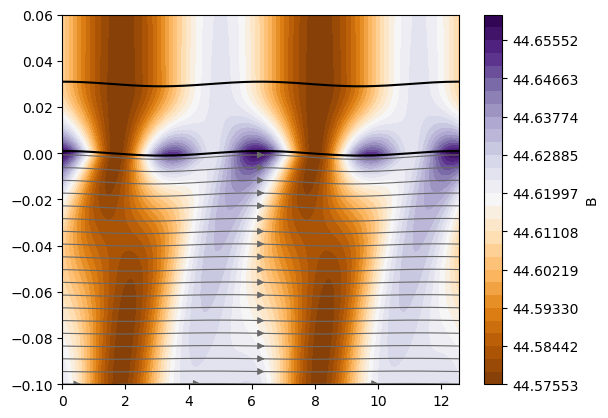

In [ ]:
file0 = "./output_BL_order0_1.dat"
solfull,dic= viz.import_data(file0)

X,Y,Z  = np.meshgrid(np.linspace(0,4*np.pi,200),0,np.linspace(-0.1,0.06,400))
U = simplify(solfull[0])
B = solfull[2]
lfunc_OC_ux = viz.lambda_func(U&C.i)
lfunc_OC_uz = viz.lambda_func(U&C.k)
J = curl(B['OC'])*1/dic['Rm']
J = B['OC']
JJ_OC = sqrt(J.dot(J))
lfunc_JJ_OC = viz.lambda_func(JJ_OC)

J = curl(B['M1'])*1/dic['Rm']
J =  B['M1']
JJ_M1 = simplify(sqrt(J.dot(J)))
lfunc_JJ_M1 = viz.lambda_func(JJ_M1)
J = curl(B['M2'])
J = B['M2']
JJ_M2 = simplify(sqrt(J.dot(J)))
print(JJ_M2)
lfunc_JJ_M2 = viz.lambda_func(JJ_M2)

topo = Et*cos(x)

UX = viz.Field(X,Y,Z,T,Ev,Et,None,lfunc_OC_ux,topo,topo2=None,lfunc_IC=None)
UZ = viz.Field(X,Y,Z,T,Ev,Et,None,lfunc_OC_uz,topo,topo2=None,lfunc_IC=None)
JD_OC = viz.Field(X,Y,Z,T,Ev,Et,None,lfunc_JJ_OC,topo,topo2=None,lfunc_IC=None)
JD_M1 = viz.Field(X,Y,Z,T,Ev,Et,None,lfunc_JJ_M1,0.03+Et*cos(x),topo2=topo,lfunc_IC=None)
JD_M2 = viz.Field(X,Y,Z,T,Ev,Et,None,lfunc_JJ_M2,0.8,topo2=0.03+Et*cos(x),lfunc_IC=None)
print('ok')
ll = np.linspace(np.nanmin([JD_OC[0],JD_M1[0],JD_M2[0]]),np.nanmax([JD_OC[0],JD_M1[0],JD_M2[0]]),30)
plt.contourf(X[0],Z[0],JD_OC[0],ll,cmap='PuOr')
plt.colorbar(label = 'B')
plt.contourf(X[0],Z[0],JD_M1[0],ll,cmap='PuOr')
plt.contourf(X[0],Z[0],JD_M2[0],ll,cmap='PuOr')

plt.streamplot(X[0].T,Z[0].T,UX[0].T,UZ[0].T,color='dimgray',linewidth =0.8)
plt.plot(X[0].T[0],Et*np.cos(X[0].T[0]),color='k')
plt.plot(X[0].T[0],0.03+Et*np.cos(X[0].T[0]),color='k')
plt.ylim(np.min(Z),np.max(Z))
plt.savefig('B_bumpy.png',bbox_inches = 'tight', dpi=300)

In [78]:
Ba = Symbol('Ba')
Bb = Symbol('Bb')

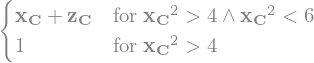

In [98]:
bu = Piecewise((x+z, And(x**2 > 4,x**2 < 6)),(1,x**2 >4 ))

bu

In [103]:
bu.args

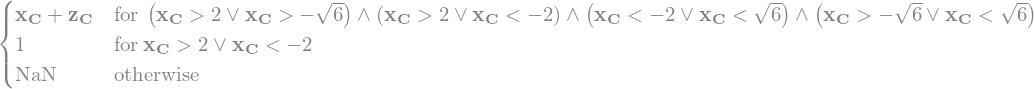

In [97]:
simplify(bu)

In [105]:
Piecewise(bu.args,(x,x>2))

TypeError: 'tuple' object is not callable

In [96]:
bu.args

In [92]:
lb =lambdify([x,z],simplify(bu))

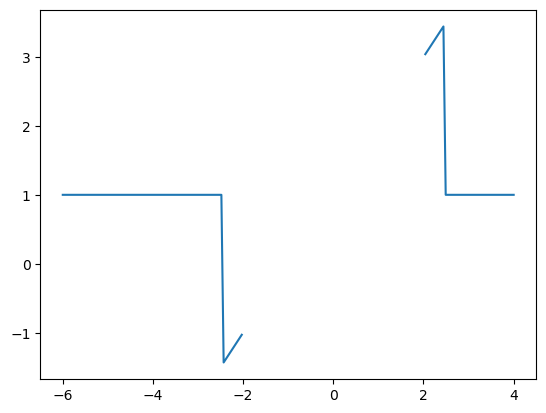

In [94]:
xx = np.linspace(-6,4,200)
plt.plot(xx,lb(xx,1))

array(12.)

In [15]:
sin_sols = ConditionSet(x, Eq(sin(x), 0), Interval(0, 2*pi))

In [21]:
ConditionSet((x,x**2), (x**2 > 4, x**2 <= 4))

TypeError: expecting bool or Boolean, not `(C.x**2 > 4, C.x**2 <= 4)`.